<a href="https://colab.research.google.com/github/charlie-perez-35/DS4002-Group5-Project3/blob/main/project3_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# load in all the packages I gotta learn how to use
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# clone git repo that has CK+ dataset
! git clone https://github.com/spenceryee/CS229

Cloning into 'CS229'...
remote: Enumerating objects: 25127, done.
remote: Total 25127 (delta 0), reused 0 (delta 0), pack-reused 25127
Receiving objects: 100% (25127/25127), 1.62 GiB | 40.56 MiB/s, done.
Resolving deltas: 100% (577/577), done.
Updating files: 100% (2077/2077), done.


In [15]:
# I will be making use of ChatGPT and the TF website to figure out how to read these bad boys in
# will try to denote which is which

# create paths for each CK+ folder from github
folder_paths = ['/content/CS229/CK+/anger', '/content/CS229/CK+/contempt', '/content/CS229/CK+/disgust',
                '/content/CS229/CK+/fear', '/content/CS229/CK+/happiness', '/content/CS229/CK+/sadness',
                '/content/CS229/CK+/surprise']
# ChatGPT
file_list = []
for folder_path in folder_paths:
    files = os.listdir(folder_path)
    files = [os.path.join(folder_path, f) for f in files]
    file_list.extend(files)

In [16]:
combined_dir = '/content/combined_CK_data'
os.makedirs(combined_dir, exist_ok=True)

In [30]:
# Iterate through the folders in the data directory
for folder_name in os.listdir(combined_dir):
    folder_path = os.path.join(combined_dir, folder_name)
    if os.path.isdir(folder_path):
        # Count the number of files in the folder
        num_files = len(os.listdir(folder_path))
        print(f'there are {num_files} images displaying "{folder_name}",')

there are 69 images displaying "happiness",
there are 28 images displaying "sadness",
there are 18 images displaying "contempt",
there are 83 images displaying "surprise",
there are 59 images displaying "disgust",
there are 25 images displaying "fear",
there are 45 images displaying "anger",


In [17]:
import shutil

for file_path in file_list:
    folder_name = os.path.basename(os.path.dirname(file_path))
    file_name = os.path.basename(file_path)
    new_folder_path = os.path.join(combined_dir, folder_name)  # New folder path in combined directory
    os.makedirs(new_folder_path, exist_ok=True)  # Create the folder if it doesn't exist
    new_file_path = os.path.join(new_folder_path, file_name)  # New file path with folder structure
    shutil.copy(file_path, new_file_path)

In [ ]:
# everything below this will only be used once we start passing things through the model
# so I'm gonna save it, but leave it unfinished because I'm a little bit confused right now.

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Define parameters for image loading
batch_size = 128
image_size = (256, 256)  # Set the desired size for your images

# Create an instance of ImageDataGenerator for loading images
data_generator = ImageDataGenerator(rescale=1./255)  # Normalize pixel values to [0,1]

# Load images from the directory
data_dir = '/content/combined_CK_data'

In [23]:
# Create a data generator for training with data augmentation
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',
    validation_split=0.2
)

# Load images for training from the directory with a larger batch size
batch_size = 64  # Increase the batch size
train_generator = train_data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)



Found 265 images belonging to 7 classes.


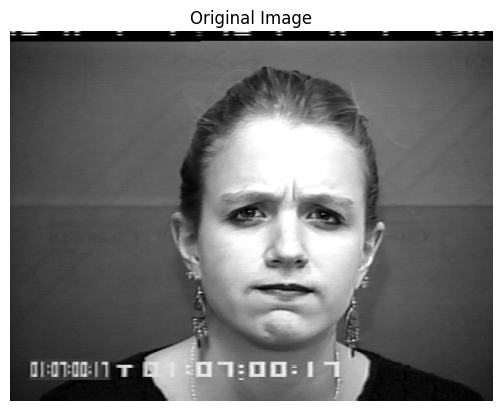

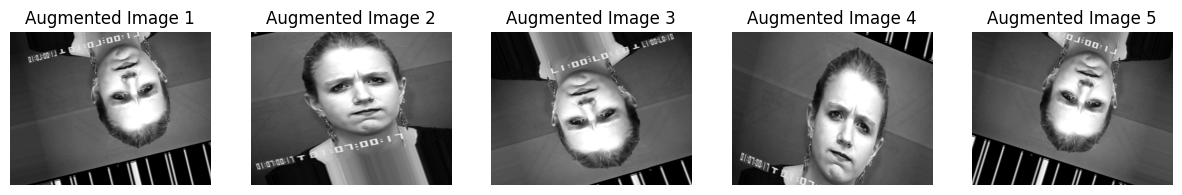

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

# Load a single grayscale image from your dataset
image_path = '/content/combined_CK_data/anger/S055_004_00000028.png'
image = load_img(image_path, color_mode='grayscale')

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert the image to a NumPy array
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)  # Convert to batch with a single image
image_array = image_array.astype('uint8')  # Ensure the datatype is uint8

# Define augmentation parameters
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Generate augmented versions of the image
augmented_images = []
num_augmented_images = 5  # Number of augmented images to generate

for _ in range(num_augmented_images):
    augmented_image_array = data_generator.random_transform(image_array[0])
    augmented_image = array_to_img(augmented_image_array, data_format='channels_last')
    augmented_images.append(augmented_image)

# Display the augmented images
plt.figure(figsize=(15, 6))
for i, augmented_image in enumerate(augmented_images):
    plt.subplot(1, num_augmented_images, i + 1)
    plt.imshow(augmented_image, cmap='gray')
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')
plt.show()




In [ ]:
plt.figure(figsize=(15, 6))
for i, augmented_image in enumerate(augmented_images):
    plt.subplot(1, num_augmented_images, i + 1)
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')
plt.show()